In [1]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Generate some data

In [2]:
n = 1000
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)
mu = 10

Define gradient operator

In [3]:
def quad_grad(y):
    return np.dot(A.T, (np.dot(A, y) - b))

Define proximal operator

In [4]:
def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t * mu, 0)

Solve!

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.48e-04
iter num 100, norm(Gk)/(1+norm(xk)): 4.50e-04, step-size: 1.64e-03
iter num 200, norm(Gk)/(1+norm(xk)): 6.16e-11, step-size: 4.43e-03
iter num 221, norm(Gk)/(1+norm(xk)): 8.44e-13, step-size: 5.46e-03
terminated


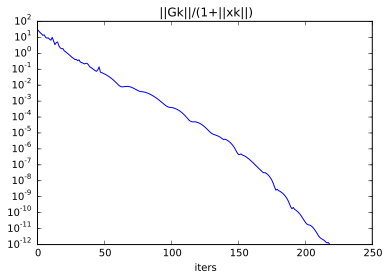

In [5]:
x = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_restart=True, eps=1e-12, gen_plots=True)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.48e-04
iter num 100, norm(Gk)/(1+norm(xk)): 3.47e-01, step-size: 1.64e-03
iter num 200, norm(Gk)/(1+norm(xk)): 5.91e-03, step-size: 4.43e-03
iter num 300, norm(Gk)/(1+norm(xk)): 5.33e-06, step-size: 2.43e-03
iter num 400, norm(Gk)/(1+norm(xk)): 6.84e-08, step-size: 6.56e-03
iter num 500, norm(Gk)/(1+norm(xk)): 2.91e-10, step-size: 4.89e-03
iter num 600, norm(Gk)/(1+norm(xk)): 1.66e-12, step-size: 4.30e-03
iter num 610, norm(Gk)/(1+norm(xk)): 9.83e-13, step-size: 4.75e-03
terminated


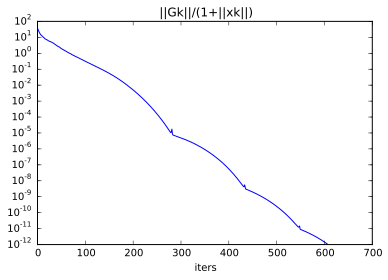

In [6]:
x_no_accleration = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_gra=True, eps = 1e-12, gen_plots=True)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.48e-04
iter num 100, norm(Gk)/(1+norm(xk)): 3.40e-02, step-size: 1.64e-03
iter num 200, norm(Gk)/(1+norm(xk)): 1.02e-03, step-size: 4.43e-03
iter num 300, norm(Gk)/(1+norm(xk)): 1.09e-04, step-size: 3.95e-03
iter num 400, norm(Gk)/(1+norm(xk)): 4.97e-06, step-size: 3.73e-03
iter num 500, norm(Gk)/(1+norm(xk)): 7.41e-07, step-size: 4.68e-03
iter num 600, norm(Gk)/(1+norm(xk)): 7.15e-08, step-size: 4.34e-03
iter num 700, norm(Gk)/(1+norm(xk)): 1.66e-09, step-size: 4.74e-03
iter num 800, norm(Gk)/(1+norm(xk)): 1.76e-09, step-size: 3.75e-03
iter num 900, norm(Gk)/(1+norm(xk)): 3.22e-11, step-size: 3.55e-03
iter num 977, norm(Gk)/(1+norm(xk)): 7.30e-13, step-size: 3.60e-03
terminated


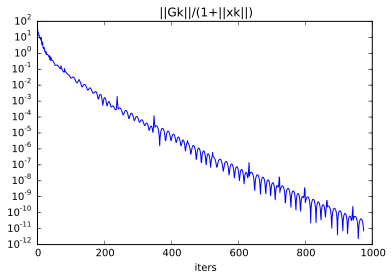

In [7]:
x_no_restart = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_restart=False, eps=1e-12, gen_plots=True)

Compare to SCS (another first-order solver)

In [8]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.sum_squares(A * z - b) + mu * cp.norm(z, 1))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS)

----------------------------------------------------------------------------
	SCS v1.1.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 104004
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 2002, constraints m = 2104
Cones:	linear vars: 2000
	soc vars: 104, soc blks: 2
Setup time: 3.95e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  3.14e-03 
   100| 7.82e-03  7.73e-03  1.24e-02  4.89e+01  5.01e+01  2.10e-14  9.47e-02 
   200| 4.98e-03  4.91e-03  1.30e-02  4.67e+01  4.80e+01  2.76e-14  1.92e-01 
   300| 4.86e-03  4.34e-03  1.34e-02  4.50e+01  4.63e+01  3

/Users/bodonoghue/.virtualenvs/sandbox/lib/python2.7/site-packages/pkg_resources/__init__.py:1250: UserWarning: /Users/bodonoghue/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
  warnings.warn(msg, UserWarning)


37.28336800967736

Relative error:

In [9]:
print(np.linalg.norm(x - z.value.A1) / np.linalg.norm(x))

0.0570565916394


Print outputs

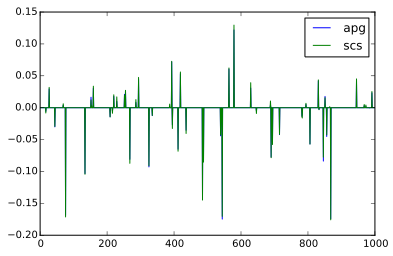

In [10]:
plt.plot(x, label='apg')
plt.plot(z.value.A1, label='scs')
plt.legend()